### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

--答案写这里--

实验数据中的有哪些变量？

答案：所需时间和文字条件

哪些是自变量？

答案：文字条件(颜色与文字内容是否一致）

哪些是因变量？

答案：所需时间（完成测试的反应时间）

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

--答案写这里--
一致样总体均值表示为μ_c，不一致的总体均值表示为μ_i，显著性水平为α = 0.05；μ_c和μ_i目前为未知。

零假设 ： μ_c - μ_i = 0, 及假设文字条件一致所需时间与文字不一致所需时间无显著差异。

对立假设 ：  μ_c - μ_i ≠ 0 及假设文字条件一致所需时间与文字不一致所需时间有显著差异。

采用双侧假设。当 α = 0.05，分布的左右两侧显著水平分别为0.025。

采用配对t检验进行验证，原因如下：

1. 由于样本数据量比较小且n<30。
2. 每组数据的总体标准差σ未知，不适合使用z-score方式进行验证。
3. 实验为测试同一个群人在文字条件一致和不一致情况下的时间反馈，通过观测两组样本数据的均值之差是否符合预期值的方式来检验假设是否成立。
4. 受试者为同一群人，所以两组数据为相关样本。
5. 假设两组数据的分布为正态分布，即使不是正态分布，t验证也能很好的处理和应对小容量数据。

综上条件，使用配对t检验中的相关样本验证是最符合的统计检验方式。

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
# 在这里执行你的分析
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import requests
import io
import math

#-------read csv file-------#
url = 'https://raw.githubusercontent.com/ShiChJ/DAND-Basic-Materials/master/P1/Project_Files/stroopdata.csv'
# fetch csv file from raw link
response = requests.get(url).content
# response is type of bytes, need to decode it to string. 
response = io.StringIO(response.decode('utf-8'))
# read csv file
test_data_set = pd.read_csv(response)
test_data_set.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


Descriptive Statistical for Congruent group:

In [2]:
# sample mean of Congruent group
mu_c = test_data_set['Congruent'].mean()

In [3]:
mu_c

14.051124999999999

In [6]:
# sample variance 
s_c = test_data_set['Congruent'].std()

In [7]:
s_c

3.5593579576451955

Descriptive Statistical for Incongruent Group

In [8]:
# sample mean of Incongruent group
mu_i = test_data_set['Incongruent'].mean()

In [9]:
mu_i

22.015916666666666

In [10]:
# sample variance 
s_i = test_data_set['Incongruent'].std()

In [11]:
s_i

4.7970571224691376

In [ ]:
创建一个新的column便于以后计算standard deviation 

In [12]:
test_data_set['difference'] = test_data_set['Congruent'].subtract(test_data_set['Incongruent'])

In [13]:
mu_D = mu_c - mu_i

In [14]:
#sample standard deviation of difference
s_D = test_data_set['difference'].std()

In [15]:
s_D

4.8648269103590556

--答案写这里--

Congruent group（一致)：
1. sample mean (mu_c) = 14.05
2. sample standard deviation (s_c) = 3.56

Incongruent group (不一致):
1. sample mean (mu_i) = 22.02
2. sample standard deviation (s_i) = 4.79

difference group (差异):
1. sample mean (mu_difference) = -7.97
2. sample standard deviation (s_difference) = 4.84


(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

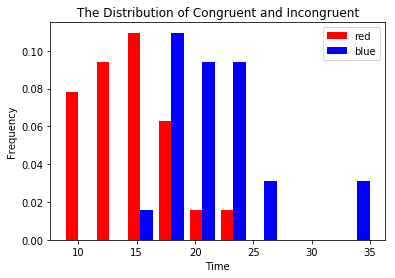

In [16]:
# 在这里创建可视化图表
n_bins = 10
colors = ['red','blue']
plt.hist([test_data_set['Congruent'],test_data_set['Incongruent']], n_bins, density=True,histtype='bar',color=colors,label=colors)
plt.title('The Distribution of Congruent and Incongruent')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.legend()
plt.show()

--答案写这里--

属于什么分布？

样本分布两侧尾部斜度趋于平缓，样本观测点为小于30，所以符合正态分布，满足t分布的前提条件

mean，sd分别是多少?

mean = -7.97

sd = 4.84


(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

# 在这里执行统计检验
# 1. 置信区间
     alpha level: 5%
     t-critical value
# 2. 关键统计值
     t-score
         1. sample mean
         2. sample error
         3. Cohen’s d
         4. r^2
# 3. 假设验证
    
     对比 alpha 与 t-score
     判断是否拒绝零假设，是否在拒绝域内(two tailed direction)
         1. 拒绝域内： reject null hypothesis
         2. 拒绝域外： accept null hypothesis
         3. 计算效应量
     计算公式:
     n = 24, p<0.05, 2-tail direction
     t-score = mean difference/ s_difference/square root of n
     d = (mu_c - mu_i)/ s_difference
     r^2 = (t^2/t^2 + df)

在已知 α 和 df 的情况下，用scipy的库可直接获取对应的t-critical value

In [17]:
# t-critical value
stats.t.ppf(1-0.025,23)

2.0686576104190406

t-critical value = 2.069。 手动查看t-table确定计算结果是否正确。α = 0.05，n = 24, df = 23, 选择双尾验证，每一侧都的临界值都是p值都是0.025.最后根据t-table得到t临界值为2.069，手动查询结果与代码运行结果一致。

In [19]:
# n = 24
# t-score = mean difference/ s_difference/square root of n
t_score = (mu_c - mu_i)/(s_D/math.sqrt(24))

In [20]:
t_score

-8.020706944109957

In [21]:
d = (mu_c - mu_i)/s_D

In [22]:
d

-1.6372199491222625

In [23]:
r_square = math.pow(t_score,2)/(math.pow(t_score,2) + 23)

In [24]:
r_square

0.736636416144506

--答案写这里--

alpha level = 5%，P = 0.05, two-tail

t-critical value = +2.069/-2.069， 两侧临界值分别2.069

mu_D = -7.97

95% CI = (-10.04, -5.90)， 置信区间为-10.04~-5.90

n = 24, df = 23

t-score = -8.02

d = -1.64   ,  1.2 <|d| < 2.0

r^2 = 0.74  ,  r^2 接近 1， 

因为 t-score < t-critical value， P-difference < P(0.05)，可以拒绝零假设。

因为t值出现在左侧的拒绝域，所以可以确定 mu_c - mu_i < 0,即mu_c < mu_i,得出结论为：

观察者在一致文字条件完成测试的速度快与不一致文字条件。通过测量Cohen’s d和 r^2发现效应量非常大。这说明虽然对应的P值非常小，对应的效应量很大说明实际意义很大，应该得到重视。




References:

https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url

https://realpython.com/python-requests/#the-get-request

https://blog.csdn.net/taiyangdao/article/details/79156389

https://docs.python.org/3/library/io.html

https://www.tutorialspoint.com/python/string_decode.htm

https://blog.csdn.net/claroja/article/details/65445063

https://www.geeksforgeeks.org/python-pandas-dataframe-subtract/

https://stackoverflow.com/questions/31674195/plot-normal-distribution-given-mean-and-sigma-python

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.sem.html

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

https://en.wikipedia.org/wiki/Effect_size#Cohen's_d